In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
values = pd.read_csv('/content/drive/MyDrive/CNN Practice Datasets/Heart Disease Prediction/values.csv')
labels = pd.read_csv('/content/drive/MyDrive/CNN Practice Datasets/Heart Disease Prediction/labels.csv')

In [3]:
values.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [4]:
labels.head()

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


## Exploratory Data Analysis

In [5]:
print(values.shape)
print(labels.shape)
print(values.info())
print(labels.info())

(180, 14)
(180, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  

In [6]:
heart = values.merge(labels,on='patient_id')
heart.head(5)

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [7]:
heart.drop('patient_id',axis=1,inplace=True)
heart.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [8]:
heart.isnull().sum()

slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

In [9]:
heart.thal.unique()

array(['normal', 'reversible_defect', 'fixed_defect'], dtype=object)

In [10]:
from sklearn.preprocessing import LabelEncoder
thal_val = pd.DataFrame(heart.thal.unique(), columns=['Thal_Types'])
enc = LabelEncoder()
# Assigning numerical values and storing in another column
thal_val['Thal_categorical'] = enc.fit_transform(thal_val['Thal_Types'])
thal_val

,Thal_Types,Thal_categorical
0,normal,1
1,reversible_defect,2
2,fixed_defect,0


In [11]:
heart['thal'] = enc.fit_transform(heart['thal'])
heart.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,1,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,1,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,1,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,2,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,2,178,1,0,0,2,270,4.2,1,59,145,0,0


In [12]:
desc = heart.describe()
desc

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,1.366667,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,0.568247,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,0.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,2.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


In [13]:
heart[heart.duplicated()]

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present


In [14]:
heart.corrwith(heart.heart_disease_present)

slope_of_peak_exercise_st_segment       0.344224
thal                                    0.447214
resting_blood_pressure                  0.078506
chest_pain_type                         0.412829
num_major_vessels                       0.421519
fasting_blood_sugar_gt_120_mg_per_dl    0.003379
resting_ekg_results                     0.145933
serum_cholesterol_mg_per_dl             0.079775
oldpeak_eq_st_depression                0.382930
sex                                     0.335421
age                                     0.138255
max_heart_rate_achieved                -0.375352
exercise_induced_angina                 0.448647
heart_disease_present                   1.000000
dtype: float64

## **Outlier Detection**

In [15]:
Q1 = desc.max_heart_rate_achieved['25%']
Q3 = desc.max_heart_rate_achieved['75%']
IQR = Q3 - Q1
lower_lim = Q1 - (1.5*IQR)
upper_lim = Q3 + (1.5*IQR)
print("IQR:",IQR)
print("Lower Limit:",lower_lim)
print("Upper Limit:",upper_lim)

IQR: 34.25
Lower Limit: 80.625
Upper Limit: 217.625


In [16]:
def find_outliers(col_name):
  outliers = []
  Q1 = col_name.quantile(0.25)
  Q3 = col_name.quantile(0.75)
  IQR = Q3 - Q1
  lower_lim = Q1 - (1.5*IQR)
  upper_lim = Q3 + (1.5*IQR)
  for out in col_name:
    if out>upper_lim or out<lower_lim:
      outliers.append(out)
  return np.array(outliers)
find_outliers(heart.resting_blood_pressure)

array([178, 180, 172, 178, 180, 180])

In [17]:
heart.columns

Index(['slope_of_peak_exercise_st_segment', 'thal', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

In [18]:
print("Outliers in slope_of_peak_exercise_st_segment:",len(find_outliers(heart.slope_of_peak_exercise_st_segment)))
print("Outliers in thal:",len(find_outliers(heart.thal)))
print("Outliers in resting_blood_pressure:",len(find_outliers(heart.resting_blood_pressure)))
print("Outliers in chest_pain_type:",len(find_outliers(heart.chest_pain_type)))
print("Outliers in num_major_vessels:",len(find_outliers(heart.num_major_vessels)))
print("Outliers in fasting_blood_sugar_gt_120_mg_per_dl:",len(find_outliers(heart.fasting_blood_sugar_gt_120_mg_per_dl)))
print("Outliers in oldpeak_eq_st_depression:",len(find_outliers(heart.oldpeak_eq_st_depression)))
print("Outliers in sex:",len(find_outliers(heart.sex)))
print("Outliers in age:",len(find_outliers(heart.age)))
print("Outliers in max_heart_rate_achieved:",len(find_outliers(heart.max_heart_rate_achieved)))
print("Outliers in exercise_induced_angina:",len(find_outliers(heart.exercise_induced_angina)))

Outliers in slope_of_peak_exercise_st_segment: 0
Outliers in thal: 0
Outliers in resting_blood_pressure: 6
Outliers in chest_pain_type: 13
Outliers in num_major_vessels: 14
Outliers in fasting_blood_sugar_gt_120_mg_per_dl: 29
Outliers in oldpeak_eq_st_depression: 4
Outliers in sex: 0
Outliers in age: 0
Outliers in max_heart_rate_achieved: 0
Outliers in exercise_induced_angina: 0


## **Other EDA**

In [19]:
from scipy.stats import skew, kurtosis

In [20]:
def col_analysis(col_name):
  print(col_name.name)
  print("Outlier Count:",len(find_outliers(col_name)))
  print("Missing Values:",col_name.isnull().sum())
  print("% of Missing Values:",round(100*(col_name.isnull().sum()/len(col_name)),2))
  print("Skewness:",skew(col_name))
  print("Kurtosis:",kurtosis(col_name))
  print("--------------------------------------")

In [21]:
print(col_analysis(heart.thal))
print(col_analysis(heart.exercise_induced_angina))
print(col_analysis(heart.num_major_vessels))
print(col_analysis(heart.resting_blood_pressure))
print(col_analysis(heart.chest_pain_type))
print(col_analysis(heart.oldpeak_eq_st_depression))
print(col_analysis(heart.max_heart_rate_achieved))
print(col_analysis(heart.slope_of_peak_exercise_st_segment))
print(col_analysis(heart.sex))
print(col_analysis(heart.resting_ekg_results))
print(col_analysis(heart.age))
print(col_analysis(heart.serum_cholesterol_mg_per_dl))
print(col_analysis(heart.fasting_blood_sugar_gt_120_mg_per_dl))

thal
Outlier Count: 0
Missing Values: 0
% of Missing Values: 0.0
Skewness: -0.19702829228577268
Kurtosis: -0.7594018270854033
--------------------------------------
None
exercise_induced_angina
Outlier Count: 0
Missing Values: 0
% of Missing Values: 0.0
Skewness: 0.7882318002900207
Kurtosis: -1.378690629011553
--------------------------------------
None
num_major_vessels
Outlier Count: 14
Missing Values: 0
% of Missing Values: 0.0
Skewness: 1.1582430715853718
Kurtosis: 0.10105467293001613
--------------------------------------
None
resting_blood_pressure
Outlier Count: 6
Missing Values: 0
% of Missing Values: 0.0
Skewness: 0.6515915088698496
Kurtosis: 0.4269155263246307
--------------------------------------
None
chest_pain_type
Outlier Count: 13
Missing Values: 0
% of Missing Values: 0.0
Skewness: -0.8421645409638178
Kurtosis: -0.30334358168598907
--------------------------------------
None
oldpeak_eq_st_depression
Outlier Count: 4
Missing Values: 0
% of Missing Values: 0.0
Skewness: 

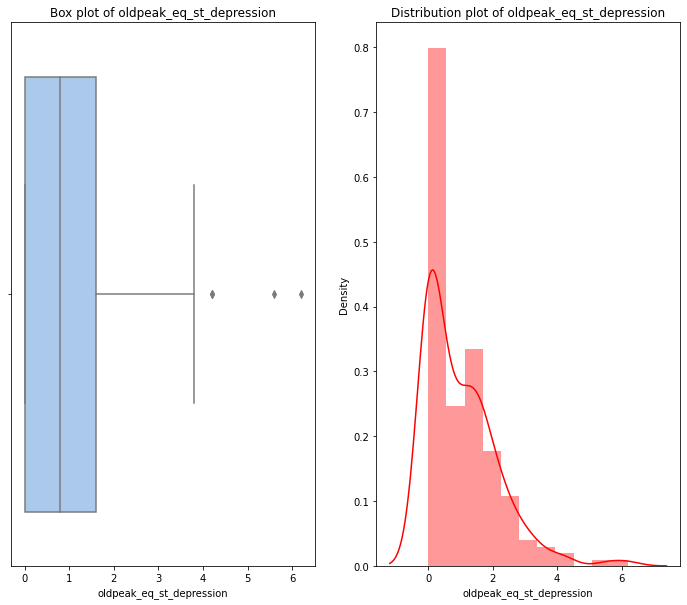

In [22]:
def plotchart(col_name):
    fig, (ax1,ax2) =plt.subplots(1,2,figsize=(12,10))
    sns.boxplot(col_name, orient='h',ax=ax1, color = 'orange',  palette= 'pastel')
    ax1.set_ylabel=col_name.name
    ax1.set_title('Box plot of {}'.format(col_name.name))
    sns.distplot(col_name,ax=ax2, color= 'red') 
    ax2.set_title('Distribution plot of {}'.format(col_name.name))
plotchart(heart.oldpeak_eq_st_depression)

In [23]:
from scipy import stats

In [24]:
fitted_data,fitted_lambda = stats.boxcox(heart.oldpeak_eq_st_depression[heart.oldpeak_eq_st_depression>0])
heart.oldpeak_eq_st_depression_initial = heart.oldpeak_eq_st_depression
heart.oldpeak_eq_st_depression[heart.oldpeak_eq_st_depression == 0] = 1/fitted_lambda

Lambda value used for Transformation: 0.36705201815358973


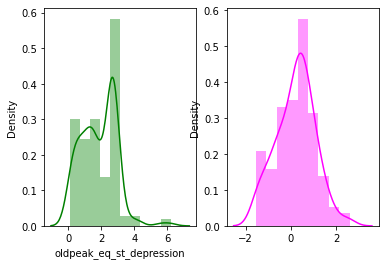

In [25]:
fig,(ax1,ax2) = plt.subplots(1,2)
sns.distplot(heart.oldpeak_eq_st_depression_initial,ax=ax1, color= 'green') 
sns.distplot(fitted_data, ax=ax2, color= 'magenta') 
print("Lambda value used for Transformation:",fitted_lambda)

## **Training the Model**

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X = heart.iloc[:,:-1]
y = heart.heart_disease_present

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [29]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(144, 13)
(36, 13)
(144,)
(36,)


## **Predictions**

In [30]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [33]:
print("R2 Score:",r2_score(y_test,y_pred))
print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:",mean_squared_error(y_test,y_pred))

R2 Score: 0.5324675324675325
Mean Absolute Error: 0.1111111111111111
Mean Squared Error: 0.1111111111111111


In [34]:
print("Accuracy Score:",accuracy_score(y_test,y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))
print("Classification Report:",classification_report(y_test,y_pred))

Accuracy Score: 0.8888888888888888
Confusion Matrix:
[[21  1]
 [ 3 11]]
Classification Report:               precision    recall  f1-score   support

           0       0.88      0.95      0.91        22
           1       0.92      0.79      0.85        14

    accuracy                           0.89        36
   macro avg       0.90      0.87      0.88        36
weighted avg       0.89      0.89      0.89        36



In [35]:
def get_scores(model,Xtrain,Xtest,ytrain,ytest,train=True):
  if train:
    x,y = Xtrain,ytrain
  else:
    x,y = Xtest,ytest
  predictions = model.predict(x)
  score = accuracy_score(y,predictions)
  print("Accuracy Score:",score)
  print("Confusion Matrix:")
  print(confusion_matrix(y,predictions))
  print("Classification Report:",classification_report(y,predictions))
  return score

In [36]:
training_score = get_scores(model, X_train, X_test, y_train, y_test, train=True)
testing_score = get_scores(model, X_train, X_test, y_train, y_test, train=False)

Accuracy Score: 0.8402777777777778
Confusion Matrix:
[[68 10]
 [13 53]]
Classification Report:               precision    recall  f1-score   support

           0       0.84      0.87      0.86        78
           1       0.84      0.80      0.82        66

    accuracy                           0.84       144
   macro avg       0.84      0.84      0.84       144
weighted avg       0.84      0.84      0.84       144

Accuracy Score: 0.8888888888888888
Confusion Matrix:
[[21  1]
 [ 3 11]]
Classification Report:               precision    recall  f1-score   support

           0       0.88      0.95      0.91        22
           1       0.92      0.79      0.85        14

    accuracy                           0.89        36
   macro avg       0.90      0.87      0.88        36
weighted avg       0.89      0.89      0.89        36



In [37]:
results = pd.DataFrame(data=[['Logistic Regression',training_score*100,testing_score*100]],columns=['Model','Training Score','Testing Score'])
results

,Model,Training Score,Testing Score
0,Logistic Regression,84.027778,88.888889


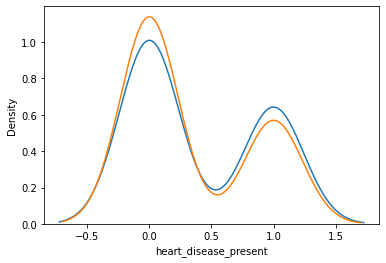

In [38]:
sns.distplot(y_test,hist=False,label='Actual Value')
sns.distplot(y_pred,hist=False,label='Predicted Value')

### K-Nearest Neighbours

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
model = KNeighborsClassifier()
model.fit(X_train,y_train)
training_score = get_scores(model, X_train, X_test, y_train, y_test, train=True)
testing_score = get_scores(model, X_train, X_test, y_train, y_test, train=False)

Accuracy Score: 0.75
Confusion Matrix:
[[65 13]
 [23 43]]
Classification Report:               precision    recall  f1-score   support

           0       0.74      0.83      0.78        78
           1       0.77      0.65      0.70        66

    accuracy                           0.75       144
   macro avg       0.75      0.74      0.74       144
weighted avg       0.75      0.75      0.75       144

Accuracy Score: 0.6666666666666666
Confusion Matrix:
[[18  4]
 [ 8  6]]
Classification Report:               precision    recall  f1-score   support

           0       0.69      0.82      0.75        22
           1       0.60      0.43      0.50        14

    accuracy                           0.67        36
   macro avg       0.65      0.62      0.62        36
weighted avg       0.66      0.67      0.65        36



In [41]:
df = pd.DataFrame([['K Nearest Neighbour',training_score*100,testing_score*100]],columns=['Model','Training Score','Testing Score'])
results = results.append(df,ignore_index=True)
results

,Model,Training Score,Testing Score
0,Logistic Regression,84.027778,88.888889
1,K Nearest Neighbour,75.000000,66.666667


### Support Vector Machine

In [42]:
from sklearn.svm import SVC

In [43]:
model = SVC()
model.fit(X_train,y_train)
training_score = get_scores(model, X_train, X_test, y_train, y_test, train=True)
testing_score = get_scores(model, X_train, X_test, y_train, y_test, train=False)

Accuracy Score: 0.6111111111111112
Confusion Matrix:
[[70  8]
 [48 18]]
Classification Report:               precision    recall  f1-score   support

           0       0.59      0.90      0.71        78
           1       0.69      0.27      0.39        66

    accuracy                           0.61       144
   macro avg       0.64      0.59      0.55       144
weighted avg       0.64      0.61      0.57       144

Accuracy Score: 0.6944444444444444
Confusion Matrix:
[[21  1]
 [10  4]]
Classification Report:               precision    recall  f1-score   support

           0       0.68      0.95      0.79        22
           1       0.80      0.29      0.42        14

    accuracy                           0.69        36
   macro avg       0.74      0.62      0.61        36
weighted avg       0.73      0.69      0.65        36



In [44]:
df = pd.DataFrame([['Support Vector Classifier',training_score*100,testing_score*100]],columns=['Model','Training Score','Testing Score'])
results = results.append(df,ignore_index=True)
results

,Model,Training Score,Testing Score
0,Logistic Regression,84.027778,88.888889
1,K Nearest Neighbour,75.000000,66.666667
2,Support Vector Classifier,61.111111,69.444444


In [45]:
model = SVC(C=2.5,kernel='linear',gamma=0.001)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.8611111111111112

In [46]:
model = SVC(C=2.5,kernel='linear')
model.fit(X_train,y_train)
training_score = get_scores(model, X_train, X_test, y_train, y_test, train=True)
testing_score = get_scores(model, X_train, X_test, y_train, y_test, train=False)

Accuracy Score: 0.8541666666666666
Confusion Matrix:
[[69  9]
 [12 54]]
Classification Report:               precision    recall  f1-score   support

           0       0.85      0.88      0.87        78
           1       0.86      0.82      0.84        66

    accuracy                           0.85       144
   macro avg       0.85      0.85      0.85       144
weighted avg       0.85      0.85      0.85       144

Accuracy Score: 0.8611111111111112
Confusion Matrix:
[[20  2]
 [ 3 11]]
Classification Report:               precision    recall  f1-score   support

           0       0.87      0.91      0.89        22
           1       0.85      0.79      0.81        14

    accuracy                           0.86        36
   macro avg       0.86      0.85      0.85        36
weighted avg       0.86      0.86      0.86        36



In [47]:
df = pd.DataFrame([['SVC with Hyperparameter Tuning',training_score*100,testing_score*100]],columns=['Model','Training Score','Testing Score'])
results = results.append(df,ignore_index=True)
results

,Model,Training Score,Testing Score
0,Logistic Regression,84.027778,88.888889
1,K Nearest Neighbour,75.000000,66.666667
2,Support Vector Classifier,61.111111,69.444444
3,SVC with Hyperparameter Tuning,85.416667,86.111111


### Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
training_score = get_scores(model, X_train, X_test, y_train, y_test, train=True)
testing_score = get_scores(model, X_train, X_test, y_train, y_test, train=False)

Accuracy Score: 1.0
Confusion Matrix:
[[78  0]
 [ 0 66]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00        66

    accuracy                           1.00       144
   macro avg       1.00      1.00      1.00       144
weighted avg       1.00      1.00      1.00       144

Accuracy Score: 0.9444444444444444
Confusion Matrix:
[[22  0]
 [ 2 12]]
Classification Report:               precision    recall  f1-score   support

           0       0.92      1.00      0.96        22
           1       1.00      0.86      0.92        14

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



In [60]:
df = pd.DataFrame([['Random Forest Classifier',training_score*100,testing_score*100]],columns=['Model','Training Score','Testing Score'])
results = results.append(df,ignore_index=True)
results

,Model,Training Score,Testing Score
0,Logistic Regression,84.027778,88.888889
1,K Nearest Neighbour,75.000000,66.666667
2,Support Vector Classifier,61.111111,69.444444
3,SVC with Hyperparameter Tuning,85.416667,86.111111
4,Random Forest Classifier,100.000000,94.444444


### XGBoost

In [61]:
from xgboost import XGBClassifier

In [62]:
model = XGBClassifier()
model.fit(X_train,y_train)
training_score = get_scores(model, X_train, X_test, y_train, y_test, train=True)
testing_score = get_scores(model, X_train, X_test, y_train, y_test, train=False)

Accuracy Score: 1.0
Confusion Matrix:
[[78  0]
 [ 0 66]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00        66

    accuracy                           1.00       144
   macro avg       1.00      1.00      1.00       144
weighted avg       1.00      1.00      1.00       144

Accuracy Score: 0.8611111111111112
Confusion Matrix:
[[19  3]
 [ 2 12]]
Classification Report:               precision    recall  f1-score   support

           0       0.90      0.86      0.88        22
           1       0.80      0.86      0.83        14

    accuracy                           0.86        36
   macro avg       0.85      0.86      0.86        36
weighted avg       0.86      0.86      0.86        36



In [63]:
df = pd.DataFrame([['XG Boost Classifier',training_score*100,testing_score*100]],columns=['Model','Training Score','Testing Score'])
results = results.append(df,ignore_index=True)
results

,Model,Training Score,Testing Score
0,Logistic Regression,84.027778,88.888889
1,K Nearest Neighbour,75.000000,66.666667
2,Support Vector Classifier,61.111111,69.444444
3,SVC with Hyperparameter Tuning,85.416667,86.111111
4,Random Forest Classifier,100.000000,94.444444
5,XG Boost Classifier,100.000000,86.111111


### Randomized Search Cross Validation

In [64]:
from sklearn.model_selection import RandomizedSearchCV

In [74]:
from random import randint
param = {'max_depth': [6,9], 
         'n_estimators':[50, 70, 100, 150], 
          'max_features': [randint(1,6)],
          'criterion' : ['gini', 'entropy'],
          'bootstrap':[True, False]}

In [78]:
model = RandomizedSearchCV(RandomForestClassifier(),param,n_iter=10,cv=9)
model.fit(X_train,y_train)
training_score = get_scores(model, X_train, X_test, y_train, y_test, train=True)
testing_score = get_scores(model, X_train, X_test, y_train, y_test, train=False)

Accuracy Score: 0.9930555555555556
Confusion Matrix:
[[78  0]
 [ 1 65]]
Classification Report:               precision    recall  f1-score   support

           0       0.99      1.00      0.99        78
           1       1.00      0.98      0.99        66

    accuracy                           0.99       144
   macro avg       0.99      0.99      0.99       144
weighted avg       0.99      0.99      0.99       144

Accuracy Score: 0.9166666666666666
Confusion Matrix:
[[21  1]
 [ 2 12]]
Classification Report:               precision    recall  f1-score   support

           0       0.91      0.95      0.93        22
           1       0.92      0.86      0.89        14

    accuracy                           0.92        36
   macro avg       0.92      0.91      0.91        36
weighted avg       0.92      0.92      0.92        36



In [79]:
df = pd.DataFrame([['Randomized Search CV',training_score*100,testing_score*100]],columns=['Model','Training Score','Testing Score'])
results = results.append(df,ignore_index=True)
results

,Model,Training Score,Testing Score
0,Logistic Regression,84.027778,88.888889
1,K Nearest Neighbour,75.000000,66.666667
2,Support Vector Classifier,61.111111,69.444444
3,SVC with Hyperparameter Tuning,85.416667,86.111111
4,Random Forest Classifier,100.000000,94.444444
5,XG Boost Classifier,100.000000,86.111111
6,Randomized Search CV,99.305556,91.666667


#### AUC-ROC Curve

In [80]:
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.tree import DecisionTreeClassifier

In [81]:
model = DecisionTreeClassifier(criterion='gini',max_depth=30,max_features=10)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7222222222222222

In [82]:
nsprob = [0 for _ in range(len(y_test))]
dtprob = model.predict_proba(X_test)[:,1]

In [83]:
nsFP, nsTP, _ = roc_curve(y_test,nsprob)
dtFP, dtTP, _ = roc_curve(y_test,dtprob)

In [84]:
nsauc = roc_auc_score(y_test,nsprob)
dtauc = roc_auc_score(y_test,dtprob)
print("No Scale AUC ROC Score:",nsauc*100,"%")
print("Decision Tree AUC ROC Score:",dtauc*100,"%")

No Scale AUC ROC Score: 50.0 %
Decision Tree AUC ROC Score: 70.77922077922078 %


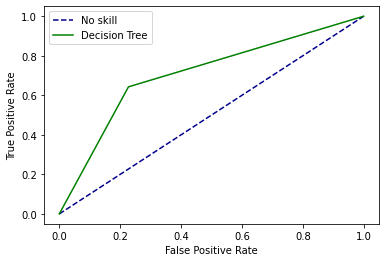

In [85]:
plt.plot(nsFP,nsTP,linestyle='--',color='darkblue',label="No skill")
plt.plot(dtFP,dtTP,linestyle='solid',color='green',label="Decision Tree")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [86]:
print("AUC Score:",(roc_auc_score(y_test,y_pred)*100),"%")

AUC Score: 70.77922077922078 %


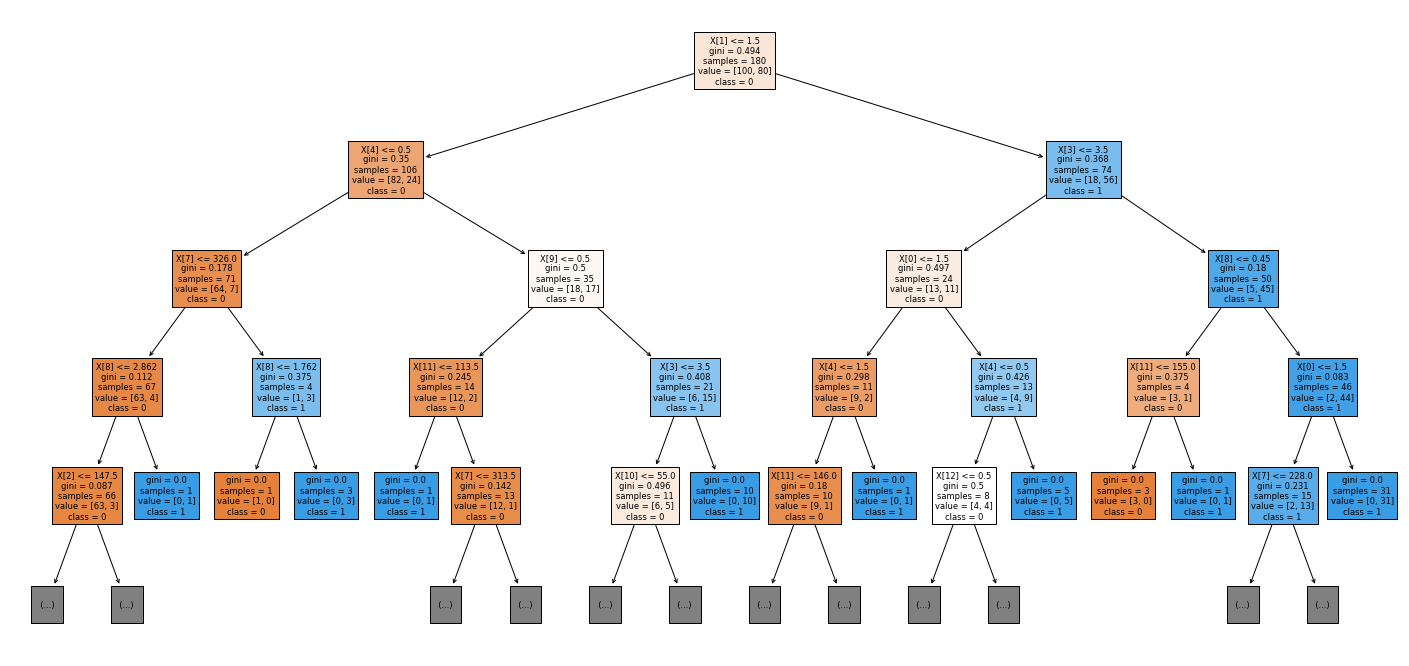

In [87]:
from sklearn import tree
from matplotlib import rcParams
rcParams['figure.figsize']=25,12
model = DecisionTreeClassifier()
model.fit(X,y)
tree.plot_tree(model,class_names=["0","1"],filled=True,max_depth=4)
plt.show()